<a href="https://colab.research.google.com/github/shashi3876/data-wrangling/blob/main/Benfords_Law.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook contains the code for the post linked [here](https://medium.com/p/ab70b0fa174b).

# Benford’s Law to Detect Fake Data

Mathematics often reveals intriguing patterns in our day-to-day lives, and one such phenomenon is Benford’s law. This law describes the surprising but simple pattern observed in real-life data. When dealing with diverse data sets such as currency amounts, population sizes, or building heights, the range of values can be wide. One would expect to find an even distribution of first digits ranging from 1 to 9. However, Benford’s law shows that this is not the case. The probability of finding the digit 1 as the first digit is relatively high (around 30%), while the probability of the other digits as the first digit decreases as the digits increase. This results in the probability of finding 9 as the first digit being just 5% instead of the expected 11.11%.

This law was first observed by Simon Newcomb in 1881. He observed that the first few pages of the logarithm tables are much more worn than the last pages. He published a paper in 1881 giving the probabilities of the first and second digits of real-life data. The probabilities he obtained for the first digit were:

Digit 1: 30.1%

Digit 2: 17.6%

Digit 3: 12.5%

Digit 4: 9.7%

Digit 5: 7.9%

Digit 6: 6.7%

Digit 7: 5.8%

Digit 8: 5.1%

Digit 9: 4.6%

Newcomb also calculated the probabilities of the second digit, which follow a similar decreasing pattern as the first digit:

Digit 1: 11.1%

Digit 2: 10.4%

Digit 3: 10.0%

Digit 4: 9.7%

Digit 5: 9.3%

Digit 6: 8.9%

Digit 7: 8.6%

Digit 8: 8.3%

Digit 9: 8.0%

Although Newcomb first observed this, it was named after American physicist Frank Benford, who rediscovered the law in 1938 and further popularized it. Benford published a paper titled “The Law of Anomalous Numbers” in the Proceedings of the American Philosophical Society, where he analyzed a wide range of datasets, including populations of cities, physical constants, and street addresses, and showed that the first-digit distribution followed a logarithmic pattern that could be approximated by Benford’s law. Since then, Benford’s law has been extensively studied and applied in various fields, such as accounting, economics, and data science.

#Benford’s Law

The probabilities of each digit as the first digit of a number can be calculated using the formula:



$P(d) = \log_{10}(1 + \frac{1}{d})$

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def get_first_digit_distribution(df, column_name):  
   
    # Extract the first digit of each value in the specified column
    first_digits = df[column_name].astype(str).str[0]
    # Remove zeros (If there are any)
    first_digits =first_digits[first_digits!='0']
    
    # Calculate the frequency of each first digit
    digit_counts = first_digits.value_counts()
    
    # Get a set of all possible digits
    all_digits = set(range(1, 10))
    all_digits = set(map(str, all_digits))

    # Check which digits are missing and add them with count 0   
    missing_digits = all_digits - set(digit_counts.index)    
    if missing_digits:
        missing_counts = pd.Series(0, index=missing_digits)
        digit_counts = digit_counts.append(missing_counts).sort_index()

    digit_counts = digit_counts.sort_index()

    # Calculate the proportion of each first digit
    total_count = digit_counts.sum()
    digit_proportions = digit_counts / total_count
    
    # Return a dictionary with the digit and its proportion
    return digit_proportions.to_dict()

def plot_benfords_law():
    # Calculate Benford's Law distribution
    digits = np.arange(1, 10)
    benford_proportions = np.log10(1 + 1 / digits)
    
    # Plot Benford's Law
    plt.bar(digits, benford_proportions)
    plt.xlabel('First Digit')
    plt.ylabel('Proportion')
    plt.title("Benford's Law")
    plt.show()

def compare_to_benfords_law(df, column_name):
    # Get the first digit distribution of the column
    digit_distribution = get_first_digit_distribution(df, column_name)
    
    # Calculate Benford's Law distribution
    digits = np.arange(1, 10)
    benford_proportions = np.log10(1 + 1 / digits)
    
    # Plot the actual distribution and Benford's Law
    fig, ax = plt.subplots()
    ax.bar(digits - 0.2, benford_proportions, width=0.4, label="Benford's Law")
    ax.bar(digits + 0.2, digit_distribution.values(), width=0.4, label="Actual")
    ax.set_xlabel('First Digit')
    ax.set_ylabel('Proportion')
    ax.set_title('First Digit Distribution')
    ax.legend()
    plt.show()




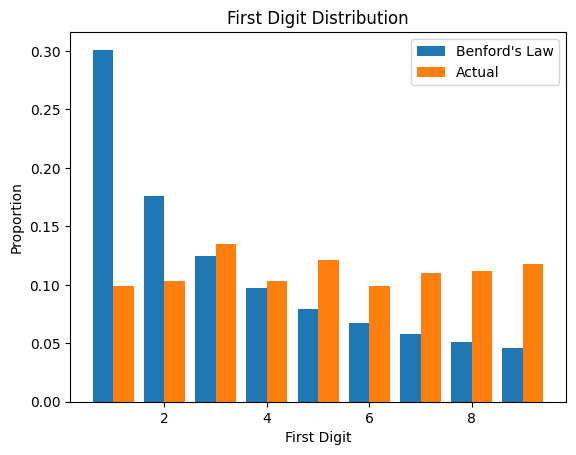

In [ ]:
def generate_fake_data(n_samples):
    # Generate random numbers between 1 and 10^6
    data = np.random.randint(1, 10**6, size=n_samples)
    
    # Convert the numbers to a pandas DataFrame
    df = pd.DataFrame({'numbers': data})
    
    return df
df=generate_fake_data(1000) 

compare_to_benfords_law(df, 'numbers')

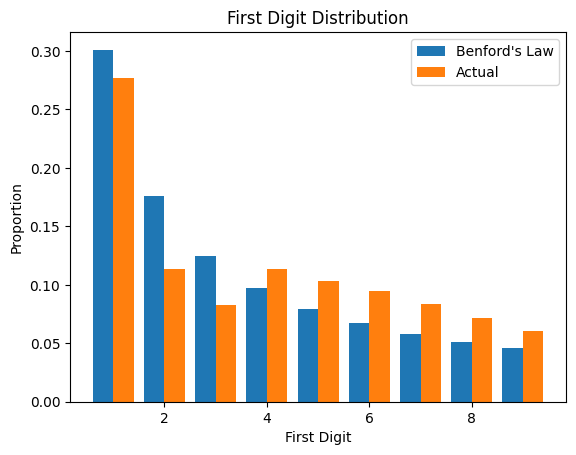

In [ ]:
import seaborn as sns

# Load the diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Call the compare_to_benfords_law function with the desired column name
compare_to_benfords_law(diamonds, 'price')

<ipython-input-75-d72b56eb27f7>:23: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  digit_counts = digit_counts.append(missing_counts).sort_index()


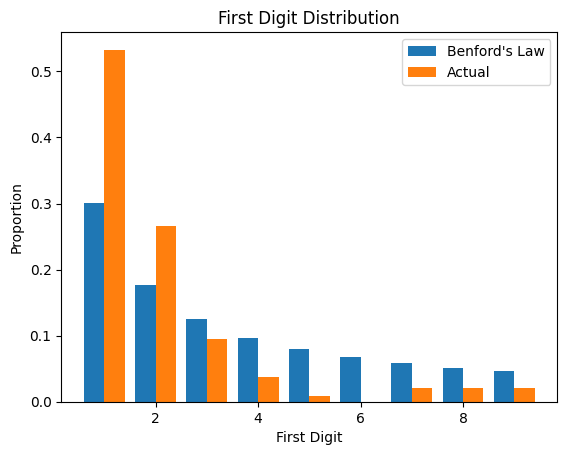

In [ ]:
# Load the tips dataset
tips = sns.load_dataset("tips")
# Call the compare_to_benfords_law function with the desired column name
compare_to_benfords_law(tips, 'total_bill')